In [1]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("../data/processed/netflix_tudum_top10_cleaned.csv")

# Preview the data
df.head()


,Rank,Title,Weeks,Total Views,Runtime,Total Watch Hours,Runtime (Minutes)
0,1,The Life List,2,29200000,2:05,60800000,125
1,2,One of Them Days,1,7700000,1:37,12400000,97
2,3,Alpha,1,5500000,1:37,8900000,97
3,4,Geostorm,1,4900000,1:49,8900000,109
4,5,Sniper: Rogue Mission,1,4800000,1:36,7700000,96


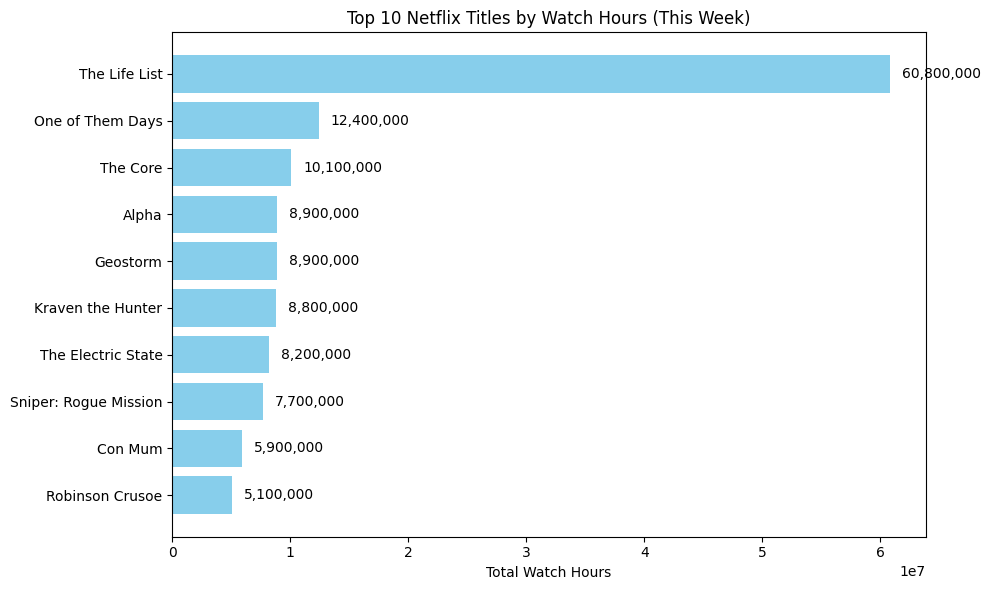

In [2]:
import matplotlib.pyplot as plt

# Sort by Total Watch Hours (just in case)
df_sorted = df.sort_values(by="Total Watch Hours", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df_sorted["Title"], df_sorted["Total Watch Hours"], color="skyblue")
plt.xlabel("Total Watch Hours")
plt.title("Top 10 Netflix Titles by Watch Hours (This Week)")
plt.gca().invert_yaxis()  # Highest at top

# Add labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1e6, bar.get_y() + bar.get_height()/2, f"{int(width):,}", va='center')

plt.tight_layout()
plt.show()


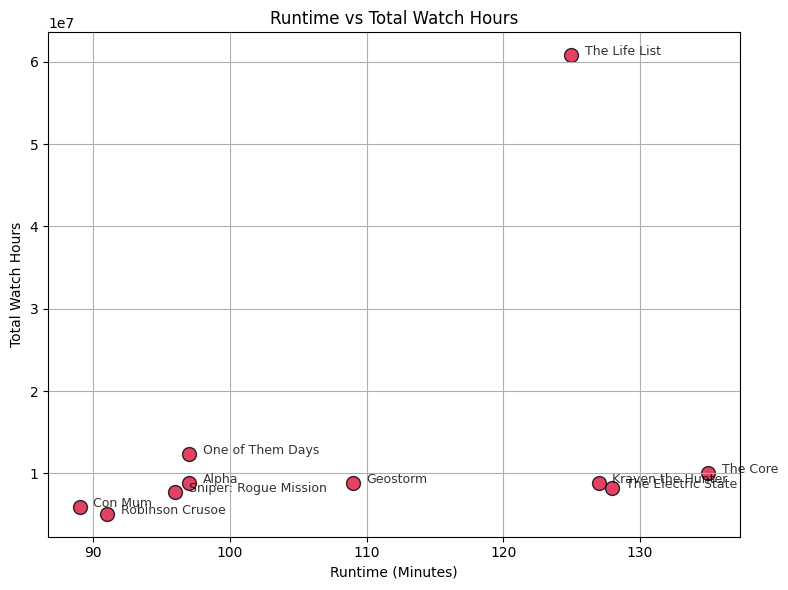

In [3]:
# Scatter plot: Runtime (Minutes) vs Total Watch Hours
plt.figure(figsize=(8, 6))
plt.scatter(df["Runtime (Minutes)"], df["Total Watch Hours"], color="crimson", s=100, edgecolor="k", alpha=0.8)

# Annotate each point with its title
for i in range(len(df)):
    plt.text(df["Runtime (Minutes)"][i] + 1,
             df["Total Watch Hours"][i],
             df["Title"][i],
             fontsize=9,
             alpha=0.8)

plt.xlabel("Runtime (Minutes)")
plt.ylabel("Total Watch Hours")
plt.title("Runtime vs Total Watch Hours")
plt.grid(True)
plt.tight_layout()
plt.show()


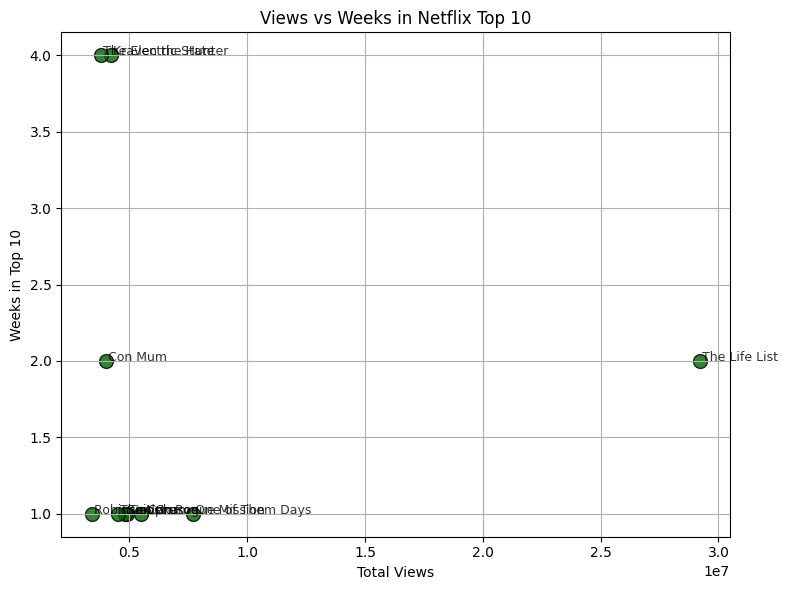

In [4]:
# Scatter plot: Views vs Weeks in Top 10
plt.figure(figsize=(8, 6))
plt.scatter(df["Total Views"], df["Weeks"], color="darkgreen", s=100, edgecolor="k", alpha=0.8)

# Annotate each point with its title
for i in range(len(df)):
    plt.text(df["Total Views"][i] + 100000,  # slight offset
             df["Weeks"][i],
             df["Title"][i],
             fontsize=9,
             alpha=0.8)

plt.xlabel("Total Views")
plt.ylabel("Weeks in Top 10")
plt.title("Views vs Weeks in Netflix Top 10")
plt.grid(True)
plt.tight_layout()
plt.show()


## 🎬 Netflix Top 10 Analysis – Week of 12/04/2025

In this short analysis, I explored Netflix's global Top 10 using data extracted from their official Tudum website. After cleaning and transforming the data, I visualized key metrics to uncover insights:

### 🔹 Top Titles by Total Watch Hours
Long-form dramas like *The Life List* and *The Core* dominated total watch time — suggesting deep engagement and possibly repeat viewings.

### 🔹 Does Runtime Impact Watch Hours?
A scatter plot comparing runtime vs watch hours showed no direct correlation — shorter films like *Sniper: Rogue Mission* still pulled major numbers.

### 🔹 Views vs Staying Power
The final plot revealed how titles like *Kraven the Hunter* maintain presence in the charts with steady views, while others spike and vanish quickly.

---

**Next Steps:**
- Add historical data to track trends across weeks
- Merge with IMDB/RottenTomatoes to compare quality vs popularity
- Push to a dashboard or automate weekly updates via Airflow

> 📌 Built with Python, pandas, matplotlib — and deployed the full pipeline to Google Cloud Storage.

🧠 *Want the code or to follow more breakdowns? Check out [github.com/ma2003x](https://github.com/ma2003x)*

